In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,fbeta_score # use fbeta_score instead of f2_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv("/content/spam.csv",encoding='latin-1',engine='python',usecols=['v1','v2'])

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.size

11144

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.columns=['label','message']

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
label,0
message,0


In [ ]:
df.duplicated().values.any()

True

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


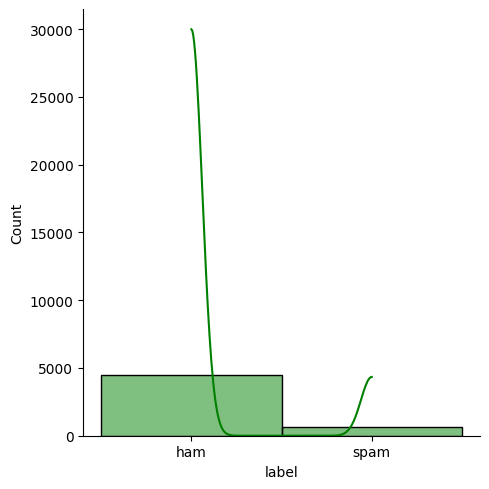

In [ ]:
sns.displot(df.label,kde=True,color="green")

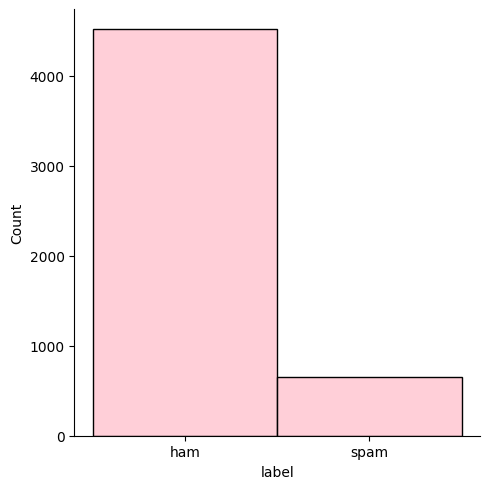

In [ ]:
sns.displot(df.label,color="pink")

In [ ]:
encoder=LabelEncoder()
df["label"]=encoder.fit_transform(df["label"].values)

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
vectorizer=TfidfVectorizer()

In [ ]:
x=vectorizer.fit_transform(df["message"])

In [ ]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df["label"]

In [ ]:
x.shape

(5169, 8672)

In [ ]:
y.shape

(5169,)

In [ ]:
df.count()

,0
label,5169
message,5169


In [ ]:
p,k=len(df["label"]==0),len(df[df["label"]==1])

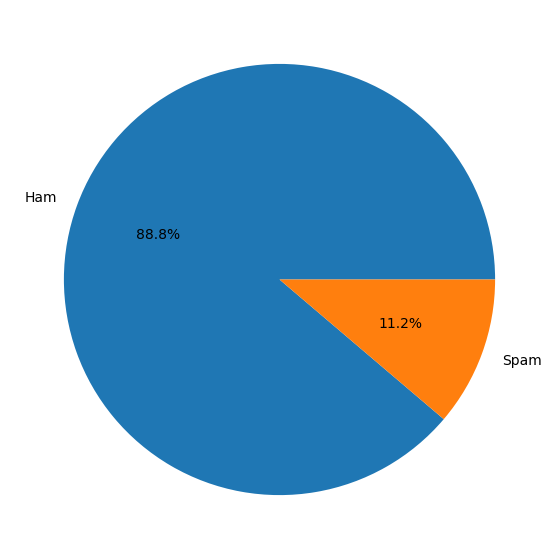

In [ ]:
lable=np.array(["Ham","Spam"])
values=np.array([p,k])
plt.figure(figsize=(7,7))
plt.pie(values,labels=lable,autopct="%1.1f%%")
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
navie_bayes_model=MultinomialNB()

In [ ]:
navie_bayes_model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
nb_predictions=navie_bayes_model.predict(x_test)

In [ ]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test,nb_predictions))
print(classification_report(y_test,nb_predictions))
print("Accuracy:",accuracy_score(y_test,nb_predictions))
print("Precision:",precision_score(y_test,nb_predictions))
print("Recall:",recall_score(y_test,nb_predictions))
print("F1 Score:",f1_score(y_test,nb_predictions))


Naive Bayes Model:
[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy: 0.9555125725338491
Precision: 1.0
Recall: 0.6827586206896552
F1 Score: 0.8114754098360656


In [ ]:
logistic_regression_model=LogisticRegression()

In [ ]:
logistic_regression_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr_predictions=logistic_regression_model.predict(x_test)

In [ ]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test,lr_predictions))
print(classification_report(y_test,lr_predictions))
print("Accuracy:",accuracy_score(y_test,lr_predictions))
print("Precision:",precision_score(y_test,lr_predictions))
print("Recall:",recall_score(y_test,lr_predictions))
print("F1 Score:",f1_score(y_test,lr_predictions))

Logistic Regression Model:
[[886   3]
 [ 43 102]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy: 0.9555125725338491
Precision: 0.9714285714285714
Recall: 0.7034482758620689
F1 Score: 0.8160000000000001


In [ ]:
svm_model=SVC(kernel='linear')

In [ ]:
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
svm_predictions=svm_model.predict(x_test)

In [ ]:
print("Support Vector Machine (SVM) Model:")
print(confusion_matrix(y_test,svm_predictions))
print(classification_report(y_test,svm_predictions))
print("Accuracy:",accuracy_score(y_test,svm_predictions))
print("Precision:",precision_score(y_test,svm_predictions))
print("Recall:",recall_score(y_test,svm_predictions))
print("F1 Score:",f1_score(y_test,svm_predictions))

Support Vector Machine (SVM) Model:
[[886   3]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.90      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy: 0.9835589941972921
Precision: 0.9776119402985075
Recall: 0.903448275862069
F1 Score: 0.939068100358423
